<a href="https://colab.research.google.com/github/rishFilet/solar_monitor_ml_model/blob/main/solar_monitor_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!ls

!pip3 install tensorflow -q
!pip3 install tensorflow_probability -q
!pip3 install git+https://github.com/henrysky/astroNN.git -q

sample_data
     |████████████████████████████████| 4.4 MB 12.4 MB/s 
     |████████████████████████████████| 802 kB 38.7 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 3.0 MB 35.6 MB/s 


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random as random
from tensorflow import keras

TODO: Load the images into a variable. Each image would correspond to a number in the list meaning 1 or 0 for active or non active. It woudl be a list of numbers

TODO: How to load images into numpy.ndarray


In [5]:
import astroNN
from astroNN import datasets
 
# To load images and labels (will download automatically at the first time)
# labels corresponds to galaxy classes as specified by Galaxy Zoo
images, labels = datasets.load_galaxy10sdss()

Galaxy10.h5:  99%|█████████▉| 208M/210M [00:07<00:00, 32.4MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:08, 25.0MB/s]                           


In [6]:
# Check the shape/dimensionality of images and labels
# in other words, check how much data is contained in the array
print('images has shape: ', images.shape)
print('labels has shape: ', labels.shape)

# Check the type of 'images' and 'labels'
print('images is a ', type(images), 'and labels is a ', type(labels), "\n")

# The 'len' operand returns the length of an array or list
print('The number of images is ', len(images), 'and the number of labels is ', len(labels), "\n")

images has shape:  (21785, 69, 69, 3)
labels has shape:  (21785,)
images is a  <class 'numpy.ndarray'> and labels is a  <class 'numpy.ndarray'> 

The number of images is  21785 and the number of labels is  21785 



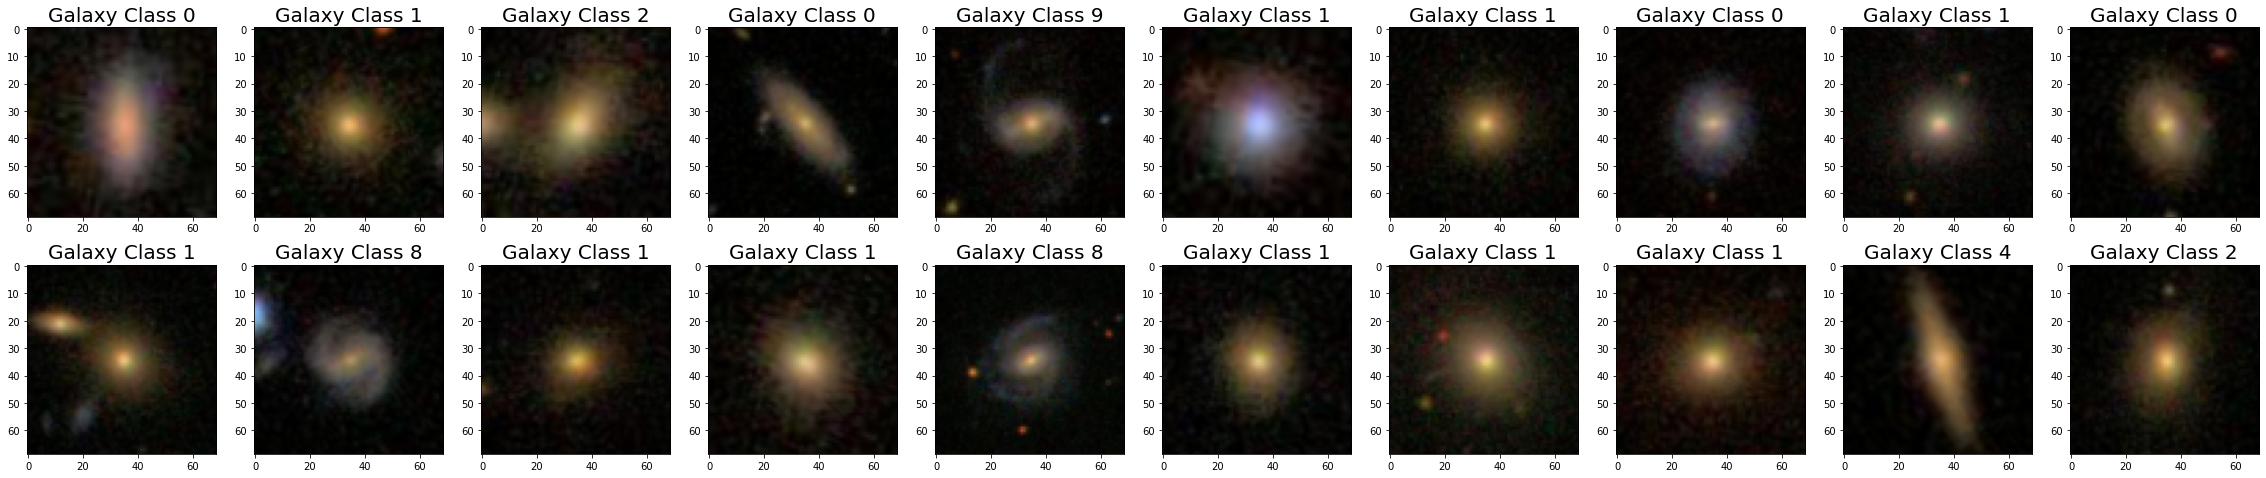

In [7]:
# Generate a matplotlib figure with 20 galaxies

# Specify the size of the plot and create a figure object
plt.figure(figsize=(40, 8))
# Iterate through 20 random images within the dataset
for i in range(20):
  random_position = random.randint(0,images.shape[0])
  # Create a labeled subplot of 2 rows and 10 columns
  ax = plt.subplot(2, 10, i + 1)
  ax.set_title(f'Galaxy Class {labels[random_position]}', fontsize=20)
  # Display the images
  plt.imshow(images[random_position])

# matplotlib subplot documentation: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

Image dimensions are:  (69, 69, 3) 

The maximum pixel value is:  255


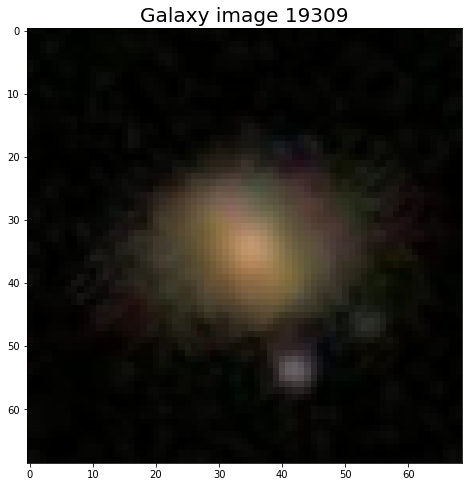

In [8]:
# Select a random image
random_position = random.randint(0, images.shape[0])
galaxy_img = images[random_position]

# Display image
plt.figure(figsize=(20,8))
plt.title(f'Galaxy image {random_position}', fontsize=20)
plt.imshow(galaxy_img)

# Dimensions of each individual image
print('Image dimensions are: ', galaxy_img.shape, '\n')

# Maximum pixel value
print('The maximum pixel value is: ', np.max(images))

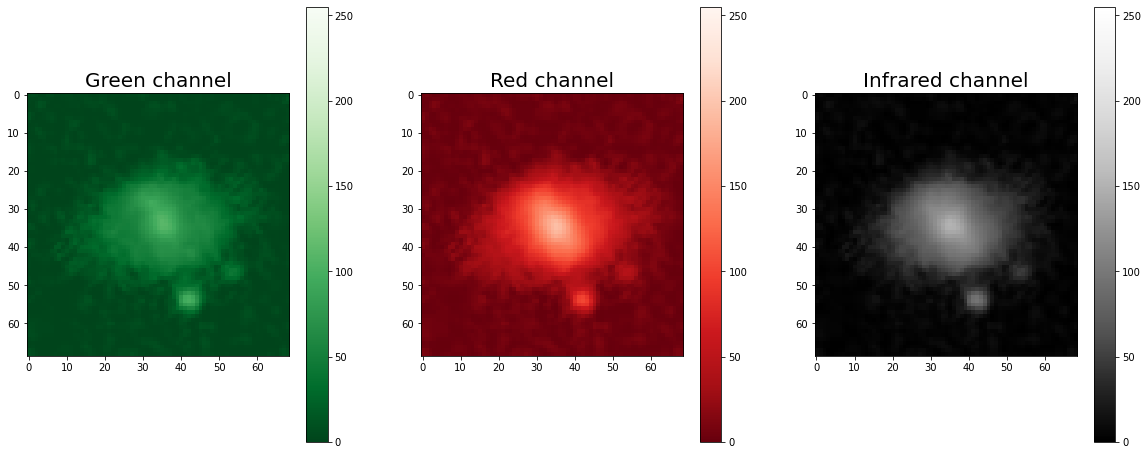

In [9]:
# Run this cell for Galaxy10SDSS

# Create a figure
plt.figure(figsize=(20, 8))

# Specify our channel names for the plot titles
channels=['Green', 'Red', 'Infrared']
# Specify the colourmaps for displaying the data (RGB)
cmaps = ['plt.cm.Greens_r', 'plt.cm.Reds_r', 'plt.cm.Greys_r']

# Create 3 subplots with the appropriate colours
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  ax.set_title(f'{channels[i]} channel', fontsize=20) 
  plt.imshow(galaxy_img[:,:,i-1], eval(cmaps[i]))
  # This ensures the colorbar expresses the full range of pixel values
  plt.clim(0,255)
  plt.colorbar()

# Keras ML section




In [10]:
# Import statements
# We're using scikit and keras for the Neural Network

from sklearn.model_selection import train_test_split
from tensorflow.keras import utils

In [11]:
# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)


maximum pixel value is now:  1.0


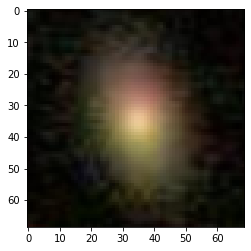

In [12]:
# Preparing data for Neural Network
# this is Keras specific, but variables need to be in float form.

labels_normalised = labels.astype(np.float32)
images_normalised = images.astype(np.float32)/255

print('maximum pixel value is now: ', np.max(images_normalised))
plt.imshow(images_normalised[0])

# Split the data into 80/20 training and testing respectively
images_train,images_test,labels_train,labels_test = train_test_split(images_normalised,labels_normalised,test_size=0.2)

## NEURAL NETWORK

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 67, 67, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 33, 33, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          1

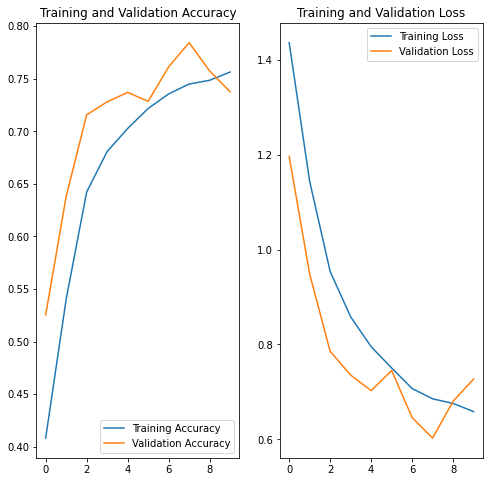

In [14]:
# Neural Network

model = tf.keras.models.Sequential([
                                    
    # first convolution layer, input is an 69x69 image x3 colors
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(69, 69, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second convolution layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # third convolution layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the image pixels
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron fully connected hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Show model architecture
model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Build history for model for graphing
history = model.fit(images_train, labels_train, epochs=10, 
                    validation_data=(images_test, labels_test))


# Visualise the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Using the model and predicting 

predictions is a  <class 'numpy.ndarray'> of length 4357
class probabilities: 
 [7.2911973e-03 9.0858752e-01 8.4117644e-02 4.5230891e-10 3.2955185e-07
 1.2451140e-13 3.2661682e-12 2.7700323e-06 1.3153097e-07 2.7607820e-07]


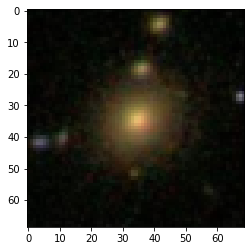

In [15]:
# Showing the first test image
plt.imshow(images_test[0])

predictions = model.predict(images_test) 
print('predictions is a ', type(predictions), 'of length', len(predictions))
print('class probabilities: \n', predictions[0])

## Under the hood stuff

In [16]:
# Let's create a list for the class labels to refer back to
# You could also make this an array of strings and give the classes actual named labels like 'merging'
# The names however are a bit too long to put in the graphs
class_labels = np.arange(10)

# Let's convert from categorical back to numerical
converted_labels = np.argmax(labels_test, axis=-1)

# And now let's get the predicted label for the first image
predicted_label = class_labels[np.argmax(predictions[0])]
print('The predicted label is:',predicted_label)

The predicted label is: 1


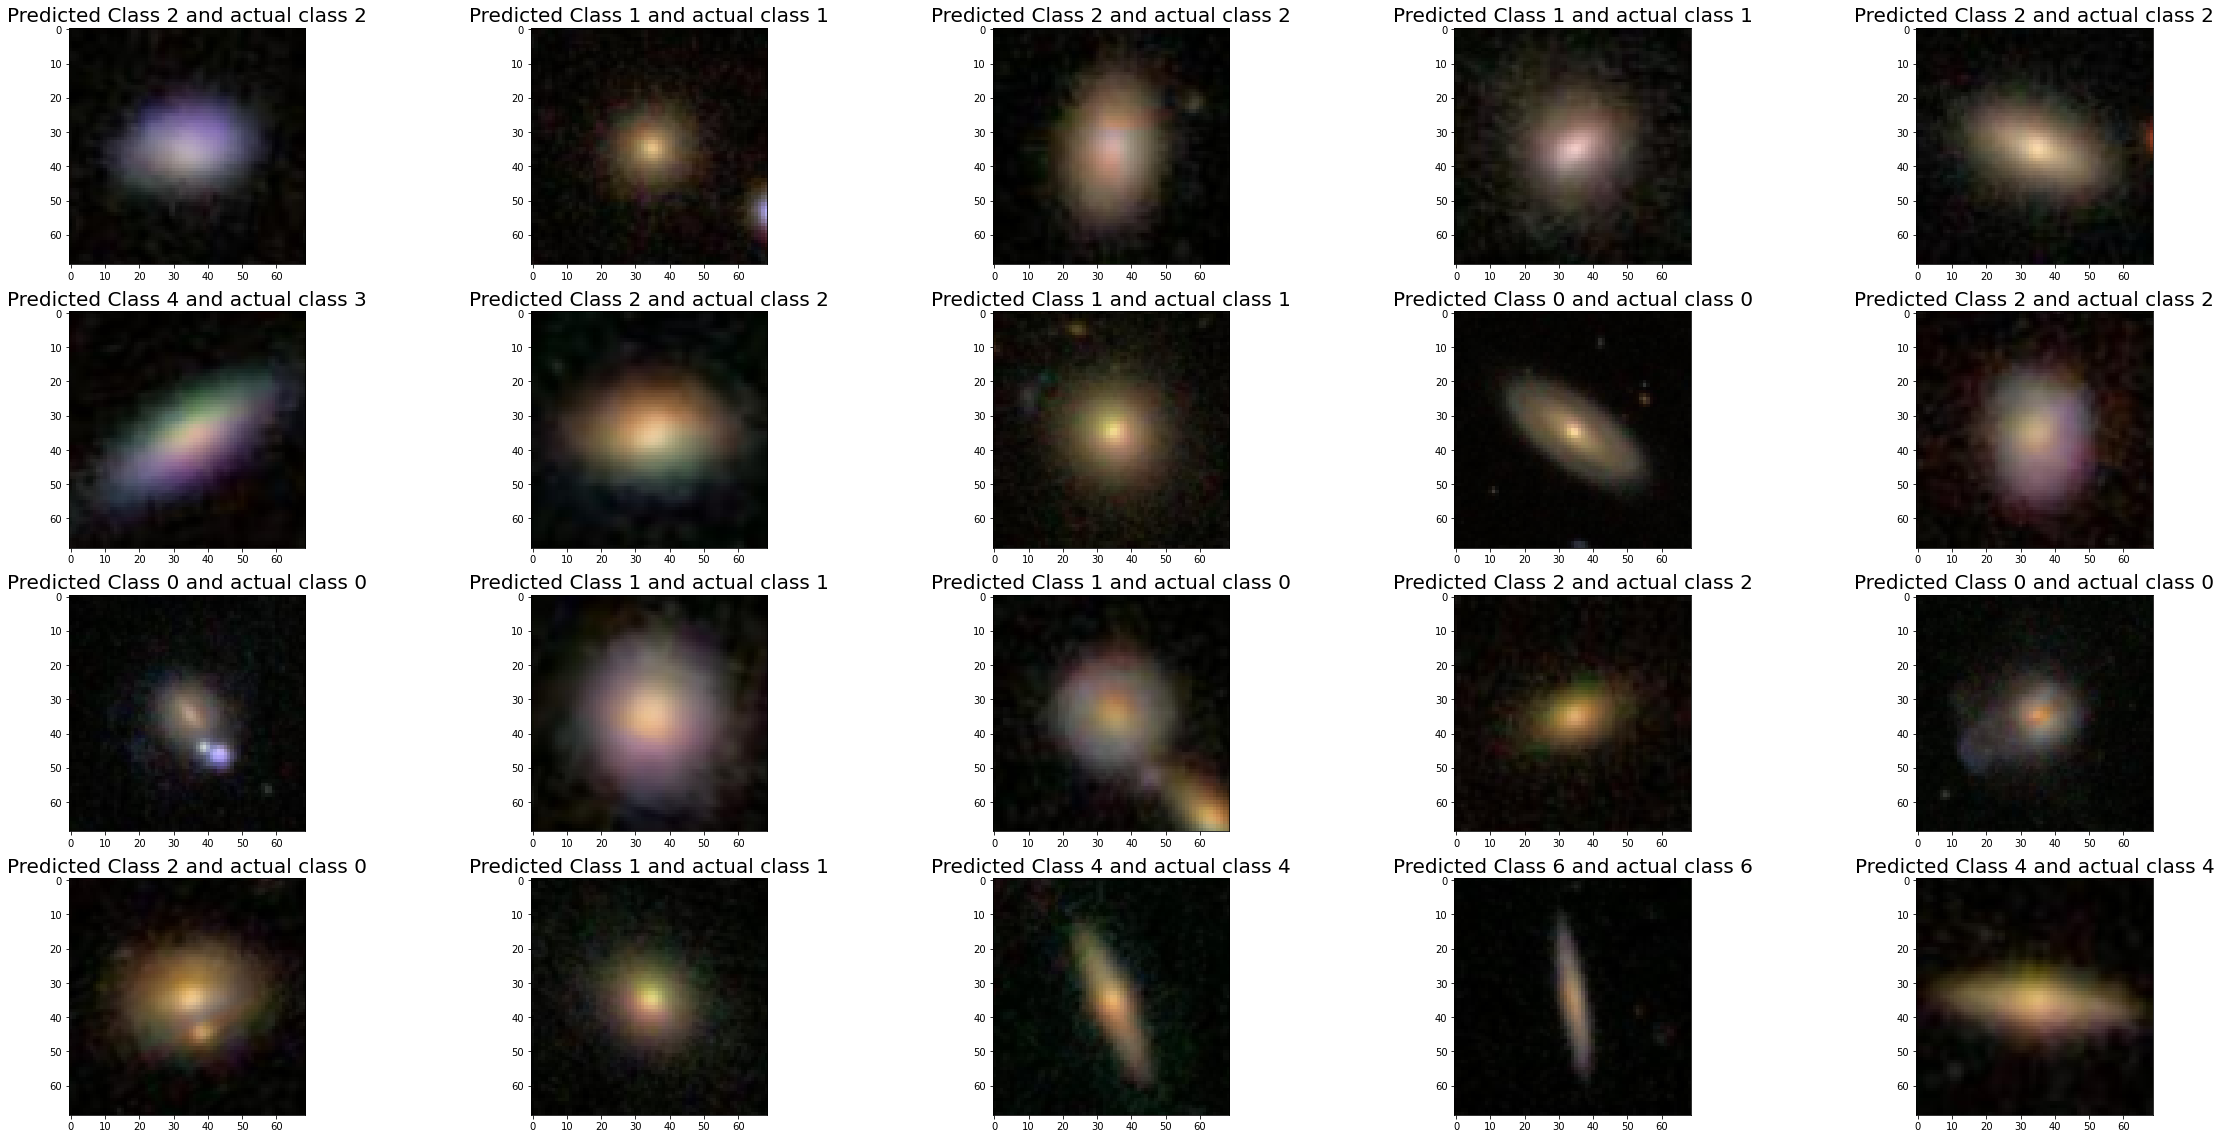

In [17]:
# Show the galaxies with their predicted and actual labels
# Effectively reusing the same plotting code as before, but we're doing 4 rows to make visualising a bit easier
plt.figure(figsize=(40, 20))
# Iterate through 20 random images within the dataset
for i in range(20):
  random_position = random.randint(0,images_test.shape[0])
  # Create a labeled subplot of 4 rows and 5 columns
  ax = plt.subplot(4, 5, i + 1)
  ax.set_title(f'Predicted Class {class_labels[np.argmax(predictions[random_position])]} and actual class {converted_labels[random_position]}', fontsize=20)
  # Display the images
  plt.imshow(images_test[random_position])